https://keras.io/examples/nlp/pretrained_word_embeddings/

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec,KeyedVectors

import logging
import nltk
from nltk.corpus import brown   
import os 

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
nltk.download('brown')

import csv
import transformers
from scipy.spatial.distance import cosine
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
#% matplotlib inline

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
c:\Users\henry\Desktop\MastersProject\QC_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# read the words from your WordData.csv file
def getWords():
    words = []
    with open('DataFiles/WordData.csv', 'r') as f:       
        for line in f:
            if line.strip()=='Word':continue #Skip heading
            words.append(line.strip())
    return words
words = getWords()
print("First 5 Words: ")
words[0:5]

First 5 Words: 


['development', 'plan', 'action', 'programme', 'training']

# Word2Vec

## Training

In [35]:
dimensions = [50,60,70,80,90] + list(np.arange(100,800,100))

In [36]:
sentences = brown.sents()
for vector_dims in dimensions:
	if not os.path.exists('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims)):
		model = gensim.models.Word2Vec(sentences, min_count=1,vector_size=vector_dims, window=5, workers=4)
		model.save('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims))
		print("Made Word2Vec Model of ", str(vector_dims), " dimensions")

2023-01-19 09:53:32,682 : INFO : collecting all words and their counts
2023-01-19 09:53:32,684 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-01-19 09:53:33,082 : INFO : PROGRESS: at sentence #10000, processed 219770 words, keeping 23488 word types
2023-01-19 09:53:33,463 : INFO : PROGRESS: at sentence #20000, processed 430477 words, keeping 34367 word types
2023-01-19 09:53:33,869 : INFO : PROGRESS: at sentence #30000, processed 669056 words, keeping 42365 word types
2023-01-19 09:53:34,227 : INFO : PROGRESS: at sentence #40000, processed 888291 words, keeping 49136 word types
2023-01-19 09:53:34,510 : INFO : PROGRESS: at sentence #50000, processed 1039920 words, keeping 53024 word types
2023-01-19 09:53:34,732 : INFO : collected 56057 word types from a corpus of 1161192 raw words and 57340 sentences
2023-01-19 09:53:34,733 : INFO : Creating a fresh vocabulary
2023-01-19 09:53:34,884 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 reta

Made Word2Vec Model of  50  dimensions


2023-01-19 09:53:46,468 : INFO : PROGRESS: at sentence #10000, processed 219770 words, keeping 23488 word types
2023-01-19 09:53:46,795 : INFO : PROGRESS: at sentence #20000, processed 430477 words, keeping 34367 word types
2023-01-19 09:53:47,149 : INFO : PROGRESS: at sentence #30000, processed 669056 words, keeping 42365 word types
2023-01-19 09:53:47,559 : INFO : PROGRESS: at sentence #40000, processed 888291 words, keeping 49136 word types
2023-01-19 09:53:47,871 : INFO : PROGRESS: at sentence #50000, processed 1039920 words, keeping 53024 word types
2023-01-19 09:53:48,084 : INFO : collected 56057 word types from a corpus of 1161192 raw words and 57340 sentences
2023-01-19 09:53:48,084 : INFO : Creating a fresh vocabulary
2023-01-19 09:53:48,224 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 56057 unique words (100.00% of original 56057, drops 0)', 'datetime': '2023-01-19T09:53:48.224459', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11

Made Word2Vec Model of  60  dimensions


2023-01-19 09:53:59,506 : INFO : PROGRESS: at sentence #10000, processed 219770 words, keeping 23488 word types
2023-01-19 09:53:59,849 : INFO : PROGRESS: at sentence #20000, processed 430477 words, keeping 34367 word types
2023-01-19 09:54:00,212 : INFO : PROGRESS: at sentence #30000, processed 669056 words, keeping 42365 word types
2023-01-19 09:54:00,561 : INFO : PROGRESS: at sentence #40000, processed 888291 words, keeping 49136 word types
2023-01-19 09:54:00,835 : INFO : PROGRESS: at sentence #50000, processed 1039920 words, keeping 53024 word types
2023-01-19 09:54:01,091 : INFO : collected 56057 word types from a corpus of 1161192 raw words and 57340 sentences
2023-01-19 09:54:01,092 : INFO : Creating a fresh vocabulary
2023-01-19 09:54:01,283 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 56057 unique words (100.00% of original 56057, drops 0)', 'datetime': '2023-01-19T09:54:01.283775', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11

Made Word2Vec Model of  70  dimensions


2023-01-19 09:54:12,901 : INFO : PROGRESS: at sentence #10000, processed 219770 words, keeping 23488 word types
2023-01-19 09:54:13,237 : INFO : PROGRESS: at sentence #20000, processed 430477 words, keeping 34367 word types
2023-01-19 09:54:13,605 : INFO : PROGRESS: at sentence #30000, processed 669056 words, keeping 42365 word types
2023-01-19 09:54:13,952 : INFO : PROGRESS: at sentence #40000, processed 888291 words, keeping 49136 word types
2023-01-19 09:54:14,224 : INFO : PROGRESS: at sentence #50000, processed 1039920 words, keeping 53024 word types
2023-01-19 09:54:14,435 : INFO : collected 56057 word types from a corpus of 1161192 raw words and 57340 sentences
2023-01-19 09:54:14,435 : INFO : Creating a fresh vocabulary
2023-01-19 09:54:14,575 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 56057 unique words (100.00% of original 56057, drops 0)', 'datetime': '2023-01-19T09:54:14.575542', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11

Made Word2Vec Model of  80  dimensions


2023-01-19 09:54:26,913 : INFO : PROGRESS: at sentence #10000, processed 219770 words, keeping 23488 word types
2023-01-19 09:54:27,242 : INFO : PROGRESS: at sentence #20000, processed 430477 words, keeping 34367 word types
2023-01-19 09:54:27,606 : INFO : PROGRESS: at sentence #30000, processed 669056 words, keeping 42365 word types
2023-01-19 09:54:27,935 : INFO : PROGRESS: at sentence #40000, processed 888291 words, keeping 49136 word types
2023-01-19 09:54:28,200 : INFO : PROGRESS: at sentence #50000, processed 1039920 words, keeping 53024 word types
2023-01-19 09:54:28,407 : INFO : collected 56057 word types from a corpus of 1161192 raw words and 57340 sentences
2023-01-19 09:54:28,408 : INFO : Creating a fresh vocabulary
2023-01-19 09:54:28,552 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 56057 unique words (100.00% of original 56057, drops 0)', 'datetime': '2023-01-19T09:54:28.552611', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11

Made Word2Vec Model of  90  dimensions


In [37]:
model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
print("First 10 dims of second word in 700 dims: ")
model.wv[words[1]][0:10]

2023-01-19 09:55:35,374 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700
2023-01-19 09:55:35,399 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.* with mmap=None
2023-01-19 09:55:35,400 : INFO : loading vectors from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.vectors.npy with mmap=None
2023-01-19 09:55:35,471 : INFO : loading syn1neg from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.syn1neg.npy with mmap=None
2023-01-19 09:55:35,552 : INFO : setting ignored attribute cum_table to None
2023-01-19 09:55:35,869 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_700', 'datetime': '2023-01-19T09:55:35.869542', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 202

First 10 dims of second word in 700 dims: 


array([ 0.04635248,  0.09131659, -0.09650849,  0.2753113 , -0.16141367,
       -0.2004109 ,  0.05806495,  0.23120125,  0.02272628,  0.13151366],
      dtype=float32)

## Testing

Missing Words from the Corpus

In [48]:
model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
print("Missing (removed) Words:")
for word in words:
	try:
		model.wv[word]
	except:
		print(word)
		words.remove(word)

def GetWord2Vec_Vector(model, word):
	 return model.wv[word]

# Make word pairs:
pairs = []
for i in range(int(len(words)/2 +1)):
	pairs.append([words[i], words[i+1]])
	i+=1
print("Example Pairs:")
pairs[0:3]

2023-01-19 09:59:00,146 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700
2023-01-19 09:59:00,163 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.* with mmap=None
2023-01-19 09:59:00,164 : INFO : loading vectors from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.vectors.npy with mmap=None
2023-01-19 09:59:00,235 : INFO : loading syn1neg from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.syn1neg.npy with mmap=None
2023-01-19 09:59:00,298 : INFO : setting ignored attribute cum_table to None
2023-01-19 09:59:00,609 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_700', 'datetime': '2023-01-19T09:59:00.609879', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 202

Missing (removed) Words:
Example Pairs:


[['development', 'plan'], ['plan', 'action'], ['action', 'training']]

In [39]:
model_100 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(100))
model_600 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(600))
model_700 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
np.dot(model_100.wv[words[1]],model_100.wv[words[2]]), np.dot(model_600.wv[words[1]],model_600.wv[words[2]]), np.dot(model_700.wv[words[1]],model_700.wv[words[2]])

2023-01-19 09:55:39,560 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_100
2023-01-19 09:55:39,605 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_100.wv.* with mmap=None
2023-01-19 09:55:39,607 : INFO : setting ignored attribute cum_table to None
2023-01-19 09:55:39,921 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_100', 'datetime': '2023-01-19T09:55:39.921334', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'loaded'}
2023-01-19 09:55:39,926 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_600
2023-01-19 09:55:39,938 : INFO : loading wv recursively from C:\Users\henry\Desktop\M

(20.451641, 20.383715, 20.330574)

In [40]:
dot_prds = []
for dims in dimensions:
	model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims))
	dim_dot_prod = []
	for pair in pairs:
		dim_dot_prod.append(np.dot(model.wv[pair[0]],model.wv[pair[1]]))
	dot_prds.append(dim_dot_prod)
dot_prods = np.array(dot_prds)
dot_prods.shape

2023-01-19 09:55:41,236 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_50
2023-01-19 09:55:41,259 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_50.wv.* with mmap=None
2023-01-19 09:55:41,260 : INFO : setting ignored attribute cum_table to None
2023-01-19 09:55:41,572 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_50', 'datetime': '2023-01-19T09:55:41.572973', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'loaded'}
2023-01-19 09:55:41,594 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_60
2023-01-19 09:55:41,615 : INFO : loading wv recursively from C:\Users\henry\Desktop\Maste

(12, 70)

Text(0, 0.5, 'Percentage Change from current dimension to 700')

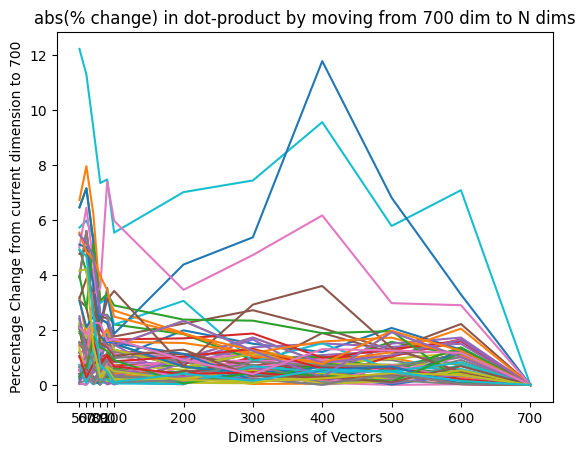

In [47]:
for word_dotprod in dot_prods.T:
	scaled_line = []
	for i, val in reversed(list(enumerate(word_dotprod))):
		try:
			if i == 0:
				scaled_line.append(val - val)
			else:
				scaled_line.append(100*abs((word_dotprod[0] - val)/word_dotprod[i-1]))
		except:
			pass
	plt.plot(dimensions, scaled_line)
plt.title("abs(% change) in dot-product by moving from 700 dim to N dims")
plt.xticks(dimensions)
plt.xlabel("Dimensions of Vectors")
plt.ylabel("Percentage Change from current dimension to 700")

# BERT

In [110]:
class BertEncoding():
	#https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=Zn0n2S-FWZih
	
	def __init__(self, data):
		# Load pre-trained model tokenizer (vocabulary)
		self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
		self.words = data
		self.model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True).eval()# output_hidden_states is whether the model returns all hidden-states. # Put the model in "evaluation" mode, meaning feed-forward operation. 
		pass
	
	def getWordEmbedding(self, word):
		marked_text = "[CLS] " + word + " [SEP]"
		tokenized_text = self.tokenizer.tokenize(marked_text)	# Tokenize our sentence with the BERT tokenizer.
		return(tokenized_text)	# Print out the tokens.
	
	def preprocessSentence(self, word, printing=None):
		# Add the special tokens.
		tokenized_text = self.getWordEmbedding(word)
		# Map the token strings to their vocabulary indeces.
		indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

		# Mark each of the 22 tokens as belonging to sentence "1".
		segments_ids = [1] * len(tokenized_text)

		# Convert inputs to PyTorch tensors
		tokens_tensor = torch.tensor([indexed_tokens])
		segments_tensors = torch.tensor([segments_ids])
		return tokens_tensor, segments_tensors
	
	def hiddenLayersBERT(self, words):
		# Run the text through BERT, and collect all of the hidden states produced from all 12 layers. 
		hidden_states = [] 
		for idx, word in enumerate(words):
			with torch.no_grad():
				outputs = self.model(word[0])
				
				# Evaluating the model will return a different number of objects based on 
				# how it's  configured in the `from_pretrained` call earlier. In this case, 
				# becase we set `output_hidden_states = True`, the third item will be the 
				# hidden states from all layers. See the documentation for more details:
				# https://huggingface.co/transformers/model_doc/bert.html#bertmodel
				hidden_states.append(outputs[2])
		return hidden_states
	
	def GetTokenVecSum(self, hidden_state):
		# Concatenate the tensors for all layers. We use `stack` here to create a new dimension in the tensor.
		# Remove dimension 1, the "batches". Swap dimensions 0 and 1.
		token_embeddings = torch.squeeze(torch.stack(hidden_state, dim=0), dim=1).permute(1,0,2)

		# `hidden_state` has shape [13 x 1 x 22 x 768]
		# `token_vecs` is a tensor with shape [22 x 768]
		token_vecs = hidden_state[-2][0]
		word_embedding = torch.mean(token_vecs, dim=0)# Calculate the average of all 22 token vectors.
		token_vecs_sum = []#stores the token vectors, with shape [22 x 768]

		for token in token_embeddings:# `token_embeddings` is a [22 x 12 x 768] tensor.
			sum_vec = torch.sum(token[-4:], dim=0)# `token` is a [12 x 768] tensor. Sum the vectors from the last four layers.
			
			token_vecs_sum.append(sum_vec)# Use `sum_vec` to represent `token`.
		#print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))
		return token_vecs_sum, word_embedding
	
	def GetEmbeddingsForBothWords(self, words):
		token_embedding_list = []
		word_embedding_list = []
		for idx, word in enumerate(words):
			token_embedding_list.append(self.GetTokenVecSum(word)[0])
			word_embedding_list.append(self.GetTokenVecSum(word)[1])
		return token_embedding_list, word_embedding_list
	
	def evaluateWordPair(self, row_numbers):
		sents_to_evaluate = [self.preprocessSentence(self.words[row_numbers[0]]), self.preprocessSentence(self.words[row_numbers[1]])]
		hidden = self.hiddenLayersBERT(sents_to_evaluate)
		embeddings = self.GetEmbeddingsForBothWords(hidden)
		return np.dot(embeddings[1][0], embeddings[1][1])
	
	def evaluateAllSentPairs(self):
		res = []
		for idx, word in enumerate(self.words):
			if idx % 2 == 0:
				try:
					res.append(self.evaluateWordPair([idx, idx+1]))
				except:
					continue
			else:
				continue
		return res

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'Dot product')

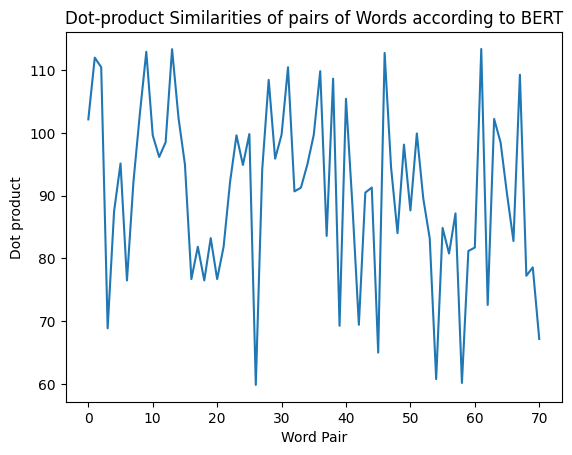

In [111]:
sentences = brown.sents()
bertWwords = BertEncoding(getWords())
similarities = bertWwords.evaluateAllSentPairs()
plt.plot(similarities)
plt.title("Dot-product Similarities of pairs of Words according to BERT")
plt.xlabel("Word Pair")
plt.ylabel("Dot product")

## BERT on Individual Words:

In [202]:
class BertEncodingWORDS():
	#https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=Zn0n2S-FWZih
	
	def __init__(self, data):
		# Load pre-trained model tokenizer (vocabulary)
		self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
		self.words = data
		self.model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True).eval()# output_hidden_states is whether the model returns all hidden-states. # Put the model in "evaluation" mode, meaning feed-forward operation. 
		pass
	
	def getWordEmbedding(self, word):
		marked_text = "[CLS] " + word + " [SEP]"
		tokenized_text = self.tokenizer.tokenize(marked_text)	# Tokenize our sentence with the BERT tokenizer.
		return(tokenized_text)	# Print out the tokens.
	
	def preprocessSentence(self, word):
		# Add the special tokens.
		tokenized_text = self.getWordEmbedding(word)
		# Map the token strings to their vocabulary indeces.
		indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

		# Mark each of the 22 tokens as belonging to sentence "1".
		segments_ids = [1] * len(tokenized_text)

		# Convert inputs to PyTorch tensors
		tokens_tensor = torch.tensor([indexed_tokens])
		segments_tensors = torch.tensor([segments_ids])
		return tokens_tensor, segments_tensors
	
	def hiddenLayersBERT(self, word):
		hidden_states = [] 
		with torch.no_grad():
			outputs = self.model(word[0])
			# https://huggingface.co/transformers/model_doc/bert.html#bertmodel
			hidden_states.append(outputs[2])
		return hidden_states

	def GetEmbeddingsForWord(self, hidden):
		# Stores the token vectors, with shape [22 x 768]
		token_vecs_sum = []

		# `token_embeddings` is a [22 x 12 x 768] tensor.

		# For each token in the sentence...
		for token in hidden:
			# `token` is a [12 x 768] tensor
			# Sum the vectors from the last four layers.
			sum_vec = torch.sum(token[0][0], dim=0)
			
			# Use `sum_vec` to represent `token`.
			token_vecs_sum.append(sum_vec)
		token_embedding_list = token_vecs_sum
		return token_embedding_list
	
	def GetTokenVecSum(self, hidden_state):
		# Stores the token vectors, with shape [22 x 768]
		token_vecs_cum_sum = []

		# `token_embeddings` is a [22 x 12 x 768] tensor.

		# For each token in the sentence...
		for token in hidden_state:

			# `token` is a [12 x 768] tensor
			# Sum the vectors from the last four layers.
			sum_vec = torch.sum(token[0][0], dim=0)
			
			# Use `sum_vec` to represent `token`.
			token_vecs_cum_sum.append(sum_vec)
		token_vecs_sum = token_vecs_cum_sum
		return token_vecs_sum

	def getWordVector(self, word):
		word_to_evaluate = self.preprocessSentence(word)
		hidden = self.hiddenLayersBERT(word_to_evaluate)
		embeddings = self.GetEmbeddingsForWord(hidden)
		return embeddings[0]

	
	def evaluateWordPair(self, row_numbers):
		sents_to_evaluate = [self.preprocessSentence(self.words[row_numbers[0]]), self.preprocessSentence(self.words[row_numbers[1]])]
		hidden = self.hiddenLayersBERT(sents_to_evaluate)
		embeddings = self.GetEmbeddingsForBothWords(hidden)
		return np.dot(embeddings[1][0], embeddings[1][1])

In [203]:
sentences = brown.sents()
bertWwords = BertEncodingWORDS(getWords())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [209]:
from scipy.spatial.distance import cosine
def evaluateAllSentPairs():
		res = []
		word_list = getWords()
		for idx, word in enumerate(word_list):
			if idx % 2 == 0:
				try:
					res.append(1 - cosine(bertWwords.getWordVector(word), bertWwords.getWordVector(word_list[idx+1])))
					print(word, word_list[idx+1])
				except:
					continue
			else:
				continue
		return res

development plan
action programme
training programme
education course
party official
government leader
state control
government intervention
tax charge
interest rate
party leader
opposition member
kitchen door
bedroom window
tax credit
family allowance
state benefit
county council
state control
town council
state benefit
county council
government intervention
party leader
market leader
board member
labour cost
housing benefit
management structure
computer system
research contract
training programme
security policy
defence minister
family allowance
tax rate
credit wage
increase management
skill planning
committee education
authority service
department assistant
manager company
director intelligence
service bus
company television
programme research
contract tax
charge datum
system world
economy management
structure company
director tax
credit league
match family
allowance personnel
manager management
skill town
hall education
course future
development telephone
number bedroom
window educ

Text(0, 0.5, 'Dot product')

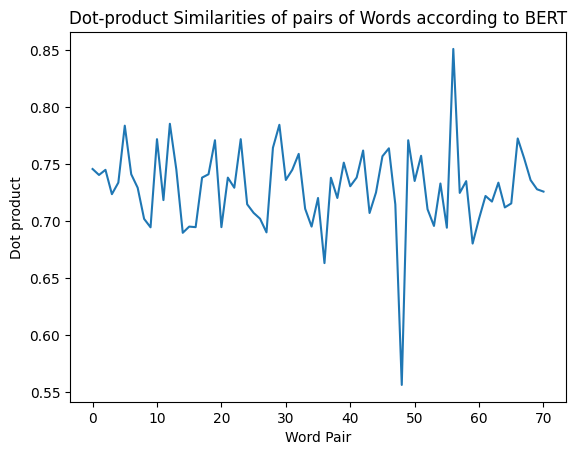

In [210]:
similarities = evaluateAllSentPairs()
plt.plot(similarities)
plt.title("Dot-product Similarities of pairs of Words according to BERT")
plt.xlabel("Word Pair")
plt.ylabel("Dot product")

In [196]:
np.dot(bertWwords.getWordVector(word1), bertWwords.getWordVector(wor2))

599.8661